# Python perfectionnement

In [1]:
# inclus dans python)
import decimal, fractions
import re
import statistics 
# scientific python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
print('coucou')

coucou


## Données de Python

### Valeurs numériques

#### Les entiers: int

In [3]:
nombrePersonnes = 5 
nombrePersonnes

5

In [4]:
type(nombrePersonnes)

int

In [5]:
compteur = 12300000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
compteur + 1

12300000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000002

#### Les nombres flottants: float (IEEE754)
64 bits (ou 32 si architecture 32 bits)

In [6]:
price = 0.1
bigDistance = 2.5E300
smallDistance = 1.25E-300
price, bigDistance, smallDistance

(0.1, 2.5e+300, 1.25e-300)

In [7]:
# bigDistance**2 # OverflowError
infDistance = bigDistance*1E10
infDistance

inf

In [8]:
infDistance * 3

inf

In [9]:
infDistance * -1

-inf

In [10]:
infDistance / infDistance

nan

#### autres types numériques
- complex
- decimal
- fractions

In [11]:
n = 1 + 3j
print(n, type(n))

(1+3j) <class 'complex'>


In [12]:
1j**2

(-1+0j)

In [13]:
price, 2*price, 3*price

(0.1, 0.2, 0.30000000000000004)

In [14]:
priceD = decimal.Decimal('0.1')
priceD, 2*priceD, 3*priceD

(Decimal('0.1'), Decimal('0.2'), Decimal('0.3'))

In [15]:
print(priceD)

0.1


In [16]:
f = fractions.Fraction(1, 3)
f, 3*f

(Fraction(1, 3), Fraction(1, 1))

### Texte: str (unicode)
quotes: ' " ''' """ avec despréfixes optionnels: f, r, b, (u)

In [17]:
city1 = 'Toulouse'
city2 = "Pau"
word = "aujourd'hui"
print(city1, city2, word)
word

Toulouse Pau aujourd'hui


"aujourd'hui"

In [18]:
city1

'Toulouse'

In [19]:
sentence = "il dit: \"aujourd'hui\""
print(sentence)
sentence

il dit: "aujourd'hui"


'il dit: "aujourd\'hui"'

In [20]:
sql = """SELECT 
    year,
    count(id) as nb
FROM movie
WHERE title like ?
GROUP BY year
ORDER nb desc
"""

In [21]:
emoji = '😛'
print(emoji)

😛


In [22]:
city3 = '東京'
print(city3)

東京


In [23]:
emoji.encode('UTF-8')

b'\xf0\x9f\x98\x9b'

In [24]:
'emoji 😛'.encode('UTF-8')

b'emoji \xf0\x9f\x98\x9b'

In [25]:
'\U0001F61C'

'😜'

In [26]:
'\N{FACE WITH STUCK-OUT TONGUE AND WINKING EYE}'

'😜'

In [27]:
f"city = {city1}"

'city = Toulouse'

In [28]:
distance = 188.5645
f"distance {city1}-{city2}: {distance:0.3f}"

'distance Toulouse-Pau: 188.565'

In [29]:
city1.upper()

'TOULOUSE'

### Booléens: bool

In [30]:
True, False

(True, False)

In [31]:
bool(emoji), bool(12)

(True, True)

In [32]:
bool(0), bool(''), bool(None)

(False, False, False)

### Collections: list, tuple, dict, set

In [33]:
# list example
cities = [ city1, city2, "Bordeaux", "Paris", "Lyon" ]
cities.append('Marseille')
cities

['Toulouse', 'Pau', 'Bordeaux', 'Paris', 'Lyon', 'Marseille']

In [34]:
# tuple example
cityT = ("Toulouse", 470_000, "31000")
cityT

('Toulouse', 470000, '31000')

In [35]:
# dict example
cityD = {
    "nom": "Toulouse", 
    "population": 470_000, 
    "code_postal": "31000"
}
cityD

{'nom': 'Toulouse', 'population': 470000, 'code_postal': '31000'}

In [36]:
cityD['langue'] = 'Oc'
cityD

{'nom': 'Toulouse',
 'population': 470000,
 'code_postal': '31000',
 'langue': 'Oc'}

In [37]:
numbers = { 12, 3, 45, 3, 67, 3 }
numbers

{3, 12, 45, 67}

In [38]:
numbers.add(12)
numbers.add(13)
numbers

{3, 12, 13, 45, 67}

In [39]:
emptyList = [] # or list()
print(emptyList, len(emptyList))

[] 0


In [40]:
emptyTuple = () # or tuple()
print(emptyTuple, len(emptyTuple))

() 0


In [41]:
emptyDict = {}  # ord dict()
print(emptyDict, len(emptyDict), type(emptyDict))

{} 0 <class 'dict'>


In [42]:
emptySet = set()
print(emptySet, len(emptySet), type(emptySet))

set() 0 <class 'set'>


### Exercice: définir une liste de villes en tant que dictionnaires (nom, population, code_postal)

In [43]:
cities = [
    {
        "nom": "Toulouse", 
        "population": 470_000, 
        "code_postal": "31000"
    },
        {
        "nom": "Marseille", 
        "population": 880_000, 
        "code_postal": "13000"
    },
    {
        "nom": "Pau", 
        "population": 77_000, 
        "code_postal": "64000"
    },
]
cities

[{'nom': 'Toulouse', 'population': 470000, 'code_postal': '31000'},
 {'nom': 'Marseille', 'population': 880000, 'code_postal': '13000'},
 {'nom': 'Pau', 'population': 77000, 'code_postal': '64000'}]

In [44]:
dfCities = pd.DataFrame(cities)
dfCities

,nom,population,code_postal
0,Toulouse,470000,31000
1,Marseille,880000,13000
2,Pau,77000,64000


## Opérateurs et fonctions intégrées (builtin)

### builtin len

In [45]:
len(cities)

3

In [46]:
#TypeError: object of type 'int/bool/...' has no len()

# len(True)
# len(12)

In [47]:
cities.__len__()

3

In [48]:
dir(cities)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [49]:
[1, 2, 3] + [4,5,6] # list.__add__

[1, 2, 3, 4, 5, 6]

In [50]:
# [1, 2, 3] * [4,5,6] TypeError: can't multiply sequence by non-int of type 'list'
[1, 2, 3] * 4 # list.__mul__

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [51]:
4 * [1, 2, 3] # int.__mul__ (NotImplmented) => list.__rmul__

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [52]:
(4).__mul__([1, 2, 3])

NotImplemented

In [53]:
[1, 2, 3].__rmul__(4)

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [54]:
# TypeError: can only concatenate str (not "int") to str
# 'Toulouse' + 4

In [55]:
dir(complex)

['__abs__',
 '__add__',
 '__bool__',
 '__class__',
 '__complex__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 'conjugate',
 'imag',
 'real']

Correspondance opérateur <-> méthode
```
+ (__add__, __radd__)
+= (__iadd__)
```

In [56]:
numbers = [12, 15, 17]
print(id(numbers))
numbers += [999, 888]  # __iadd__(..) , i.e .extend(..)
print(id(numbers))
numbers

1353781097920
1353781097920


[12, 15, 17, 999, 888]

In [57]:
dir(int)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'as_integer_ratio',
 'bit_count',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'is_integer',
 

In [58]:
x = 12
print(id(x))
x += 3
print(id(x))
x

140711587117848
140711587117944


15

In [59]:
city = "Marseille"
print(id(city))
city += ", ville portuaire"
print(id(city))
city

1353782424304
1353782662432


'Marseille, ville portuaire'

In [60]:
dfCities

,nom,population,code_postal
0,Toulouse,470000,31000
1,Marseille,880000,13000
2,Pau,77000,64000


In [61]:
dfCities['population'] += 10

In [62]:
dfCities

,nom,population,code_postal
0,Toulouse,470010,31000
1,Marseille,880010,13000
2,Pau,77010,64000


### cas de la division

In [63]:
7 / 3  # __truediv__

2.3333333333333335

In [64]:
7 // 3  # __floordiv__

2

In [65]:
7 % 3 # __mod__

1

In [66]:
divmod(7,3)  # __divmod__

(2, 1)

In [67]:
dir(int) # filter toutes les méthodes __???__ contenant 'div' ou 'mod'

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'as_integer_ratio',
 'bit_count',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'is_integer',
 

In [68]:
# list comprehension
[ m for m in dir(int) if re.fullmatch(r'__.*(div|mod).*__', m) ]

['__divmod__',
 '__floordiv__',
 '__mod__',
 '__rdivmod__',
 '__rfloordiv__',
 '__rmod__',
 '__rtruediv__',
 '__truediv__']

In [69]:
[ m for m in dir(int) if m.startswith('__')  and m.endswith('__') and ('div' in m or 'mod' in m) ]

['__divmod__',
 '__floordiv__',
 '__mod__',
 '__rdivmod__',
 '__rfloordiv__',
 '__rmod__',
 '__rtruediv__',
 '__truediv__']

In [70]:
for m in dir(int):
    if ('div' in m or 'mod' in m) and m.startswith('__') and m.endswith('__'):
        print(m)

__divmod__
__floordiv__
__mod__
__rdivmod__
__rfloordiv__
__rmod__
__rtruediv__
__truediv__


In [71]:
valeurs1 = [1, 2, 3]
valeurs2 = [1, 2, 3]
valeurs1 == valeurs2, valeurs1 is valeurs2

(True, False)

### cas du produit matriciel

In [72]:
m1 = np.array(
    [[1, 2],
     [3, 4]]
)
m2 = np.array(
    [[2, -1],
     [-1, 3]]
)
print(m1)
print(m2)

[[1 2]
 [3 4]]
[[ 2 -1]
 [-1  3]]


In [73]:
m1 * m2

array([[ 2, -2],
       [-3, 12]])

In [74]:
m1 @ m2

array([[0, 5],
       [2, 9]])

In [75]:
np.matmul(m1,m2)

array([[0, 5],
       [2, 9]])

In [76]:
m1.dot(m2)

array([[0, 5],
       [2, 9]])

### cas des filtres de pandas (et numpy)
bitwise => elementwise pour | (or), & (and), ~ (not), ^ (xor)

In [77]:
dfCitiesFr = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/51606633-fb13-4820-b795-9a2a575a72f1')
dfCitiesFr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39145 entries, 0 to 39144
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   insee_code           39145 non-null  object 
 1   city_code            39145 non-null  object 
 2   zip_code             39145 non-null  int64  
 3   label                39145 non-null  object 
 4   latitude             38934 non-null  float64
 5   longitude            38934 non-null  float64
 6   department_name      39145 non-null  object 
 7   department_number    39145 non-null  object 
 8   region_name          39145 non-null  object 
 9   region_geojson_name  39145 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.0+ MB


In [78]:
dfCitiesFr

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
0,25620,ville du pont,25650,ville du pont,46.999873,6.498147,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
1,25624,villers grelot,25640,villers grelot,47.361512,6.235167,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
2,25615,villars les blamont,25310,villars les blamont,47.368384,6.871415,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
3,25619,les villedieu,25240,les villedieu,46.713906,6.265831,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
4,25622,villers buzon,25170,villers buzon,47.228558,5.852187,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
...,...,...,...,...,...,...,...,...,...,...
39140,98829,thio,98829,thio,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39141,98831,voh,98833,voh,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39142,98832,yate,98834,yate,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39143,98612,sigave,98620,sigave,-14.270411,-178.155263,wallis-et-futuna,986,wallis-et-futuna,Wallis-et-Futuna


In [79]:
dfCitiesFr[dfCitiesFr.label == 'bordes']

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
17642,64138,bordes,64510,bordes,43.243525,-0.273609,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
23499,65101,bordes,65190,bordes,43.196985,0.214207,hautes-pyrénées,65,occitanie,Occitanie


In [80]:
dfCitiesFr[
    (dfCitiesFr.label == 'bordes') 
    & (dfCitiesFr.department_number == '64')
]

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
17642,64138,bordes,64510,bordes,43.243525,-0.273609,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine


In [81]:
dfCitiesFr.label == 'bordes'

0        False
1        False
2        False
3        False
4        False
         ...  
39140    False
39141    False
39142    False
39143    False
39144    False
Name: label, Length: 39145, dtype: bool

In [82]:
dfCitiesFr.department_number == '64'

0        False
1        False
2        False
3        False
4        False
         ...  
39140    False
39141    False
39142    False
39143    False
39144    False
Name: department_number, Length: 39145, dtype: bool

In [83]:
dfCitiesWithoutCoords = dfCitiesFr[dfCitiesFr.latitude.isna()]
dfCitiesWithoutCoords

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
38931,98711,anaa,98786,hitianau,NaN,NaN,polynésie-française,987,polynésie-française,Polynésie française
38932,98712,arue,98701,arue,NaN,NaN,polynésie-française,987,polynésie-française,Polynésie française
38933,98713,arutua,98761,rautini,NaN,NaN,polynésie-française,987,polynésie-française,Polynésie française
38934,98713,arutua,98762,niutahi,NaN,NaN,polynésie-française,987,polynésie-française,Polynésie française
38935,98714,bora bora,98730,anau,NaN,NaN,polynésie-française,987,polynésie-française,Polynésie française
...,...,...,...,...,...,...,...,...,...,...
39138,98815,mare,98878,la roche,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39139,98822,poindimie,98822,poindimie,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39140,98829,thio,98829,thio,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39141,98831,voh,98833,voh,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie


In [84]:
dfCitiesWithoutCoords.department_name.unique()

array(['polynésie-française', 'nouvelle-calédonie'], dtype=object)

In [85]:
dfCitiesWithoutCoords.department_name.nunique()

2

In [86]:
dfCitiesWithCoords = dfCitiesFr[~dfCitiesFr.latitude.isna()]  # ou directement 'notna'
dfCitiesWithCoords

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
0,25620,ville du pont,25650,ville du pont,46.999873,6.498147,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
1,25624,villers grelot,25640,villers grelot,47.361512,6.235167,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
2,25615,villars les blamont,25310,villars les blamont,47.368384,6.871415,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
3,25619,les villedieu,25240,les villedieu,46.713906,6.265831,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
4,25622,villers buzon,25170,villers buzon,47.228558,5.852187,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
...,...,...,...,...,...,...,...,...,...,...
38929,97613,m tsangamouji,97650,m tsangamouji,-12.751168,45.086393,mayotte,976,mayotte,Mayotte
38930,97614,ouangani,97670,ouangani,-12.837567,45.138321,mayotte,976,mayotte,Mayotte
39104,98901,ile de clipperton,98799,ile de clipperton,10.297389,-109.221264,polynésie-française,987,polynésie-française,Polynésie française
39143,98612,sigave,98620,sigave,-14.270411,-178.155263,wallis-et-futuna,986,wallis-et-futuna,Wallis-et-Futuna


In [87]:
dfCitiesFr.latitude.mean() # Series.mean()

46.694541953733136

In [88]:
np.mean(dfCitiesFr.latitude), np.nanmean(dfCitiesFr.latitude) # numpy.mean sur la pandas.Series

(46.694541953733136, 46.694541953733136)

In [89]:
np.mean(dfCitiesFr.latitude.values), np.nanmean(dfCitiesFr.latitude.values) # numpy.mean on raw data (ndarray)

(nan, 46.694541953733136)

In [90]:
statistics.mean(dfCitiesFr.latitude.values)

nan

In [91]:
dfCitiesFr.latitude.values

array([ 46.9998734 ,  47.36151209,  47.36838372, ...,          nan,
       -14.2704112 , -13.28186254])

In [92]:
type(dfCitiesFr.latitude.values)

numpy.ndarray

## getitem, setitem, slice, subscriptable object

### str

In [93]:
city = "Toulouse"
city[0], city[7], city[-1], city[-8]   #, city[8] => IndexError: string index out of range

('T', 'e', 'e', 'T')

In [94]:
# TypeError: 'str' object does not support item assignment
# city[0] = 'Z'

### list

In [95]:
numbers = [11, 22, 33]
numbers[0] = 44
numbers

[44, 22, 33]

### dict

In [96]:
cityT = ("Toulouse", 470_000, "31000")
city[0]

'T'

In [97]:
name, pop, zipcode = cityT
print(name, pop, zipcode)

Toulouse 470000 31000


In [98]:
name, pop,_ = cityT

In [99]:
data = np.random.normal(10, 3, 1_000_000)
data.mean(), data.std(), data.shape

(9.99447096232123, 3.004999655200169, (1000000,))

In [100]:
data[0], data[500_000], data[-1]

(13.050561776002276, 8.76705599180255, 9.843518558537681)

In [101]:
cityD = {
    "nom": "Toulouse", 
    "population": 470_000, 
    "code_postal": "31000"
}
cityD["nom"]

'Toulouse'

In [102]:
'name' in cityD

False

In [103]:
try:
    cityD["name"]
except: # all exceptions
    pass

In [104]:
try:
    cityD["name"]
except KeyError as e: # one precise exception
    print("KeyError exception happend:", e)
    # print(dir(e))

KeyError exception happend: 'name'


In [105]:
try:
    cityD["name"]
except KeyError: # one precise exception
    pass

### DataFrame

In [106]:
# colonne
dfCitiesFr['label']

0              ville du pont
1             villers grelot
2        villars les blamont
3              les villedieu
4              villers buzon
                ...         
39140                   thio
39141                    voh
39142                   yate
39143                 sigave
39144                   uvea
Name: label, Length: 39145, dtype: object

In [107]:
dfCitiesFr.loc[2]

insee_code                               25615
city_code                  villars les blamont
zip_code                                 25310
label                      villars les blamont
latitude                             47.368384
longitude                             6.871415
department_name                          doubs
department_number                           25
region_name            bourgogne-franche-comté
region_geojson_name    Bourgogne-Franche-Comté
Name: 2, dtype: object

In [108]:
dfCitiesFr.iloc[2]

insee_code                               25615
city_code                  villars les blamont
zip_code                                 25310
label                      villars les blamont
latitude                             47.368384
longitude                             6.871415
department_name                          doubs
department_number                           25
region_name            bourgogne-franche-comté
region_geojson_name    Bourgogne-Franche-Comté
Name: 2, dtype: object

In [109]:
dfCitiesFrSorted = dfCitiesFr.sort_values(['department_number', 'label'])
dfCitiesFrSorted

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
5528,01004,amberieu en bugey,1500,amberieu en bugey,45.961049,5.372275,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
20381,01005,amberieux en dombes,1330,amberieux en dombes,45.996164,4.911967,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
20382,01006,ambleon,1300,ambleon,45.749886,5.594585,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
4640,01007,ambronay,1500,ambronay,46.005691,5.357749,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
4605,01008,ambutrix,1500,ambutrix,45.936683,5.332447,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...,...,...,...,...
39123,98830,touho,98831,touho,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39118,98809,l ile des pins,98832,vao,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39141,98831,voh,98833,voh,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39107,98814,lifou,98820,we,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie


In [110]:
dfCitiesFrSorted.loc[2]

insee_code                               25615
city_code                  villars les blamont
zip_code                                 25310
label                      villars les blamont
latitude                             47.368384
longitude                             6.871415
department_name                          doubs
department_number                           25
region_name            bourgogne-franche-comté
region_geojson_name    Bourgogne-Franche-Comté
Name: 2, dtype: object

In [111]:
dfCitiesFrSorted.iloc[2]

insee_code                            01006
city_code                           ambleon
zip_code                               1300
label                               ambleon
latitude                          45.749886
longitude                          5.594585
department_name                         ain
department_number                        01
region_name            auvergne-rhône-alpes
region_geojson_name    Auvergne-Rhône-Alpes
Name: 20382, dtype: object

In [112]:
dfCitiesFr.iloc[-1]

insee_code                        98613
city_code                          uvea
zip_code                          98600
label                              uvea
latitude                     -13.281863
longitude                   -176.161928
department_name        wallis-et-futuna
department_number                   986
region_name            wallis-et-futuna
region_geojson_name    Wallis-et-Futuna
Name: 39144, dtype: object

In [113]:
dfCitiesFrSorted.iloc[-1]

insee_code                          98832
city_code                            yate
zip_code                            98834
label                                yate
latitude                              NaN
longitude                             NaN
department_name        nouvelle-calédonie
department_number                     988
region_name            nouvelle-calédonie
region_geojson_name    Nouvelle Calédonie
Name: 39142, dtype: object

### ndarray

<BarContainer object of 1000 artists>

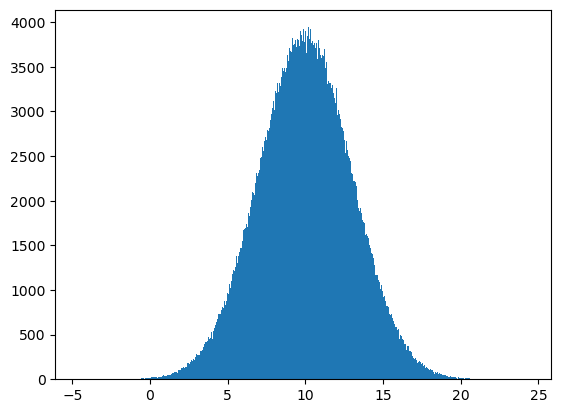

In [114]:
_,_,g = plt.hist(data, bins=1000)
g

### Slices

In [115]:
# 3 premières lettres
print(city[0:3])
print(city[:3])

Tou
Tou


In [116]:
# autres slices
print(city[3:6])
print(city[6:])
print(city[:])

lou
se
Toulouse


In [117]:
# 3 dernières lettres
city[-3:]

'use'

In [118]:
# mot à l'envers
city[::-1]

'esuoluoT'

#### ndarray from numpy

In [119]:
data

array([13.05056178, 10.18115098, 15.40287808, ...,  6.78172644,
        9.24579907,  9.84351856])

In [120]:
type(data)

numpy.ndarray

In [121]:
data[:20]

array([13.05056178, 10.18115098, 15.40287808, 13.63252307, 12.02484871,
       11.90664741,  7.01920103, 10.51650534,  6.78508406,  7.98089542,
        7.33086678, 13.70882263,  9.6262505 , 12.63623389, 10.95338293,
        7.25522814, 17.23447682,  9.99349138, 13.45058506, 10.33724573])

In [122]:
# prendre un échantillon tous les 10 valeurs et tracer l'histogramme

In [123]:
echantillon = data[::10]
print(len(echantillon))
print(echantillon.shape)

100000
(100000,)


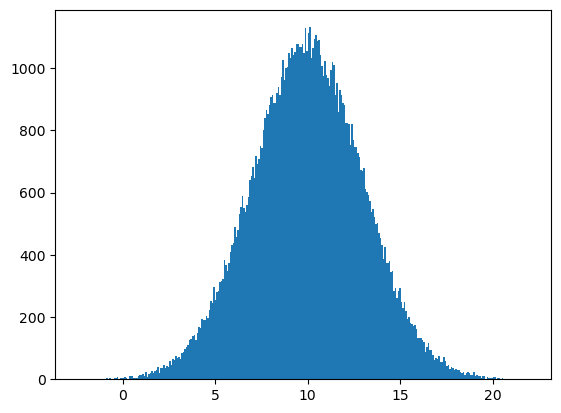

In [124]:
_ = plt.hist(echantillon, bins=300)

In [125]:
echantillon.flags # echantillon n'est pas une copie, c'est une vue

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [126]:
echantillon[1] = 9.9
echantillon

array([13.05056178,  9.9       ,  7.90032549, ...,  5.8086339 ,
        6.97409017, 11.31791931])

In [127]:
data[:11]

array([13.05056178, 10.18115098, 15.40287808, 13.63252307, 12.02484871,
       11.90664741,  7.01920103, 10.51650534,  6.78508406,  7.98089542,
        9.9       ])

In [128]:
data2d = data.reshape((1000,1000))
print(data2d.shape)
print(data2d.flags)

(1000, 1000)
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [129]:
data2d[3,4]

12.865895976465008

In [130]:
assert data2d[3,4] == data2d[3][4]

In [131]:
# row #3
data2d[3]

array([ 8.47091004e+00,  3.99008867e+00,  1.13500864e+01,  8.71292359e+00,
        1.28658960e+01,  1.48914894e+01,  8.32943200e+00,  1.13190352e+01,
        8.52685674e+00,  7.56840255e+00,  5.75594101e+00,  1.01697557e+01,
        1.60159578e+01,  6.31444134e+00,  1.18942203e+01,  1.00259578e+01,
        8.54804545e+00,  1.24257933e+01,  9.68724968e+00,  1.10237886e+01,
        1.35224045e+01,  1.26355162e+01,  9.13664250e+00,  9.48610988e+00,
        4.51831035e+00,  6.46832711e+00,  1.63644637e+01,  8.52455932e+00,
        1.01031924e+01,  4.79196245e+00,  9.07915989e+00,  9.30193953e+00,
        1.29533753e+01,  1.18133281e+01,  1.43495823e+01,  1.94685319e+01,
        9.73829584e+00,  5.11758147e+00,  4.99941569e+00,  2.10231314e+00,
        9.31528314e+00,  8.42072619e+00,  9.77683458e+00,  8.73767738e+00,
        8.19441160e+00,  5.90394018e+00,  7.07314404e+00,  1.71736322e+01,
        1.06938162e+01,  1.14360886e+01,  1.32079040e+01,  5.70911928e+00,
        1.00734921e+01,  

In [132]:
# column #3
data2d[:,3]

array([13.63252307, 13.39659316,  8.7107207 ,  8.71292359, 12.34325021,
       12.52894687, 11.45473533, 10.03132858,  6.06827192,  6.32034924,
       15.57774539,  5.64868387,  8.94157199,  7.07700235,  6.22493222,
        8.05824882,  7.09072046,  8.29960904, 16.44724226, 14.57648856,
        9.39741354,  8.46163921,  6.52321075, 13.77727701,  7.18502514,
        9.04751586,  9.23808069, 10.20596156, 12.83191947,  4.30998562,
       10.42364924, 10.08526456,  6.44237254, 13.00631459, 12.96430983,
        4.59476137,  9.53779931,  4.78918573, 12.49704729, 13.39061375,
       17.59613323, 14.72257457,  7.51941058, 10.06498363, 13.72959462,
        3.28789794, 10.99287607,  9.23350982,  9.39382208,  8.60936402,
       10.49336577,  7.29123774, 13.04692536, 13.74252172,  8.00741389,
       13.06930289,  3.3309153 , 16.50526634, 15.185118  ,  8.99549575,
        6.28088947, 14.14679972, 10.85674805,  6.4079397 , 10.74224573,
       14.05681013,  8.99391772,  8.58048552,  7.50043278, 13.07

In [133]:
# row #3 of transposed matrix == column #3
data2d.T[3]

array([13.63252307, 13.39659316,  8.7107207 ,  8.71292359, 12.34325021,
       12.52894687, 11.45473533, 10.03132858,  6.06827192,  6.32034924,
       15.57774539,  5.64868387,  8.94157199,  7.07700235,  6.22493222,
        8.05824882,  7.09072046,  8.29960904, 16.44724226, 14.57648856,
        9.39741354,  8.46163921,  6.52321075, 13.77727701,  7.18502514,
        9.04751586,  9.23808069, 10.20596156, 12.83191947,  4.30998562,
       10.42364924, 10.08526456,  6.44237254, 13.00631459, 12.96430983,
        4.59476137,  9.53779931,  4.78918573, 12.49704729, 13.39061375,
       17.59613323, 14.72257457,  7.51941058, 10.06498363, 13.72959462,
        3.28789794, 10.99287607,  9.23350982,  9.39382208,  8.60936402,
       10.49336577,  7.29123774, 13.04692536, 13.74252172,  8.00741389,
       13.06930289,  3.3309153 , 16.50526634, 15.185118  ,  8.99549575,
        6.28088947, 14.14679972, 10.85674805,  6.4079397 , 10.74224573,
       14.05681013,  8.99391772,  8.58048552,  7.50043278, 13.07

In [134]:
# echantillon: n=10, n 1ères lignes et colonnes
n=10
echantillon2d = data2d[:n,:n]
print(echantillon2d)

[[13.05056178 10.18115098 15.40287808 13.63252307 12.02484871 11.90664741
   7.01920103 10.51650534  6.78508406  7.98089542]
 [ 7.89670623 15.86285681 10.26760485 13.39659316  6.49726506  9.762431
  12.8099431  12.64054026  5.1948619   9.65406713]
 [13.56064754  9.78927066 12.34528873  8.7107207  12.53628767  6.70147499
  13.52781601  9.11094352 10.28194124  7.87510462]
 [ 8.47091004  3.99008867 11.3500864   8.71292359 12.86589598 14.89148938
   8.329432   11.31903522  8.52685674  7.56840255]
 [10.65131059 14.27469694 10.60418819 12.34325021  9.22480537  9.52247765
   9.89997315  2.858067   12.44148779  4.76887278]
 [10.03020408 14.00853433 12.48131816 12.52894687 12.44297282 12.72640641
  14.24147513  7.06302118 11.70540295  8.67148401]
 [12.05753838  8.5740292  12.09371012 11.45473533 11.58963592 10.91119701
  14.30579803 13.12348348  8.38483008 15.2905144 ]
 [15.05332152 12.55304924 11.96540663 10.03132858 10.00660135  8.1684542
  13.65947032 13.20994998 16.22704266 14.2918078 ]
 [ 

In [135]:
# symétrique horizontale
echantillon2d[::-1]

array([[ 4.44330146,  6.48922286,  5.61644669,  6.32034924, 14.7275985 ,
         8.47740176,  4.97757903,  4.64650226, 12.09595171, 12.35049386],
       [ 9.35742525,  9.43025362, 11.33338879,  6.06827192,  6.9777048 ,
         6.40410434,  5.82986959,  6.4714073 ,  9.22678904,  6.81392048],
       [15.05332152, 12.55304924, 11.96540663, 10.03132858, 10.00660135,
         8.1684542 , 13.65947032, 13.20994998, 16.22704266, 14.2918078 ],
       [12.05753838,  8.5740292 , 12.09371012, 11.45473533, 11.58963592,
        10.91119701, 14.30579803, 13.12348348,  8.38483008, 15.2905144 ],
       [10.03020408, 14.00853433, 12.48131816, 12.52894687, 12.44297282,
        12.72640641, 14.24147513,  7.06302118, 11.70540295,  8.67148401],
       [10.65131059, 14.27469694, 10.60418819, 12.34325021,  9.22480537,
         9.52247765,  9.89997315,  2.858067  , 12.44148779,  4.76887278],
       [ 8.47091004,  3.99008867, 11.3500864 ,  8.71292359, 12.86589598,
        14.89148938,  8.329432  , 11.31903522

In [136]:
# symétrique verticale
echantillon2d[:,::-1]

array([[ 7.98089542,  6.78508406, 10.51650534,  7.01920103, 11.90664741,
        12.02484871, 13.63252307, 15.40287808, 10.18115098, 13.05056178],
       [ 9.65406713,  5.1948619 , 12.64054026, 12.8099431 ,  9.762431  ,
         6.49726506, 13.39659316, 10.26760485, 15.86285681,  7.89670623],
       [ 7.87510462, 10.28194124,  9.11094352, 13.52781601,  6.70147499,
        12.53628767,  8.7107207 , 12.34528873,  9.78927066, 13.56064754],
       [ 7.56840255,  8.52685674, 11.31903522,  8.329432  , 14.89148938,
        12.86589598,  8.71292359, 11.3500864 ,  3.99008867,  8.47091004],
       [ 4.76887278, 12.44148779,  2.858067  ,  9.89997315,  9.52247765,
         9.22480537, 12.34325021, 10.60418819, 14.27469694, 10.65131059],
       [ 8.67148401, 11.70540295,  7.06302118, 14.24147513, 12.72640641,
        12.44297282, 12.52894687, 12.48131816, 14.00853433, 10.03020408],
       [15.2905144 ,  8.38483008, 13.12348348, 14.30579803, 10.91119701,
        11.58963592, 11.45473533, 12.09371012

#### pandas DataFrame and Series

##### .iloc

In [137]:
dfCitiesFr.iloc[:10]  # .head(10)

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
0,25620,ville du pont,25650,ville du pont,46.999873,6.498147,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
1,25624,villers grelot,25640,villers grelot,47.361512,6.235167,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
2,25615,villars les blamont,25310,villars les blamont,47.368384,6.871415,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
3,25619,les villedieu,25240,les villedieu,46.713906,6.265831,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
4,25622,villers buzon,25170,villers buzon,47.228558,5.852187,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
5,25625,villers la combe,25510,villers la combe,47.240810,6.473842,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
6,25627,villers sous chalamont,25270,villers sous chalamont,46.901588,6.045328,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
7,25632,voujeaucourt,25420,voujeaucourt,47.473553,6.782506,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
8,02102,bouconville vauclair,2860,bouconville vauclair,49.460193,3.756685,aisne,02,hauts-de-france,Hauts-de-France
9,02105,bouresches,2400,bouresches,49.067056,3.316703,aisne,02,hauts-de-france,Hauts-de-France


In [138]:
dfCitiesFr.iloc[-5:] # .tail(5)

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
39140,98829,thio,98829,thio,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39141,98831,voh,98833,voh,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39142,98832,yate,98834,yate,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39143,98612,sigave,98620,sigave,-14.270411,-178.155263,wallis-et-futuna,986,wallis-et-futuna,Wallis-et-Futuna
39144,98613,uvea,98600,uvea,-13.281863,-176.161928,wallis-et-futuna,986,wallis-et-futuna,Wallis-et-Futuna


In [139]:
dfCitiesFr.iloc[:5, 2:4]

,zip_code,label
0,25650,ville du pont
1,25640,villers grelot
2,25310,villars les blamont
3,25240,les villedieu
4,25170,villers buzon


##### .loc (index str)

In [140]:
dfCitiesFrInsee = dfCitiesFr.set_index('insee_code')
dfCitiesFrInsee.head(2)

,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
insee_code,,,,,,,,,
25620,ville du pont,25650,ville du pont,46.999873,6.498147,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
25624,villers grelot,25640,villers grelot,47.361512,6.235167,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté


In [141]:
dfCitiesFrInsee.loc['25624']

city_code                       villers grelot
zip_code                                 25640
label                           villers grelot
latitude                             47.361512
longitude                             6.235167
department_name                          doubs
department_number                           25
region_name            bourgogne-franche-comté
region_geojson_name    Bourgogne-Franche-Comté
Name: 25624, dtype: object

In [142]:
dfCitiesFrInsee.index.min(), dfCitiesFrInsee.index.max()

('01001', '98901')

In [143]:
dfCitiesFr.loc[dfCitiesFr.insee_code.str.startswith('31')]

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
21300,31008,anan,31230,anan,43.352336,0.811013,haute-garonne,31,occitanie,Occitanie
21301,31009,antichan de frontignes,31510,antichan de frontignes,42.969894,0.676237,haute-garonne,31,occitanie,Occitanie
21302,31010,antignac,31110,antignac,42.830562,0.588436,haute-garonne,31,occitanie,Occitanie
21303,31020,aspet,31160,aspet,43.011445,0.806105,haute-garonne,31,occitanie,Occitanie
21304,31022,aucamville,31140,aucamville,43.671099,1.423339,haute-garonne,31,occitanie,Occitanie
...,...,...,...,...,...,...,...,...,...,...
25503,31580,villate,31860,villate,43.468337,1.381867,haute-garonne,31,occitanie,Occitanie
25505,31586,villeneuve lecussan,31580,villeneuve lecussan,43.134111,0.485188,haute-garonne,31,occitanie,Occitanie
25507,31589,villenouvelle,31290,villenouvelle,43.437785,1.662807,haute-garonne,31,occitanie,Occitanie
25509,31591,escoulis,31260,escoulis,43.111423,1.030996,haute-garonne,31,occitanie,Occitanie


In [144]:
inseeCode31 = dfCitiesFr.loc[dfCitiesFr.insee_code.str.startswith('31'), 'insee_code']
inseeCode31

21300    31008
21301    31009
21302    31010
21303    31020
21304    31022
         ...  
25503    31580
25505    31586
25507    31589
25509    31591
25511    31593
Name: insee_code, Length: 600, dtype: object

In [145]:
inseeCode31.min(), inseeCode31.max()

('31001', '31593')

In [146]:
# NB: min and max values MUST exists in df (only for str type)
dfCitiesFrInsee.loc['31001':'31593']

,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
insee_code,,,,,,,,,
31001,agassac,31230,agassac,43.372368,0.886031,haute-garonne,31,occitanie,Occitanie
12059,castanet,12240,castanet,44.292817,2.308062,aveyron,12,occitanie,Occitanie
31002,aignes,31550,aignes,43.334573,1.586507,haute-garonne,31,occitanie,Occitanie
12060,castelmary,12800,castelmary,44.172344,2.245011,aveyron,12,occitanie,Occitanie
31005,alan,31420,alan,43.219954,0.927183,haute-garonne,31,occitanie,Occitanie
...,...,...,...,...,...,...,...,...,...
31589,villenouvelle,31290,villenouvelle,43.437785,1.662807,haute-garonne,31,occitanie,Occitanie
32351,roques,32310,roques,43.841921,0.297489,gers,32,occitanie,Occitanie
31591,escoulis,31260,escoulis,43.111423,1.030996,haute-garonne,31,occitanie,Occitanie


In [147]:
dfCitiesFrInsee.loc[
    '31001':'31593',
    'label'
]

insee_code
31001          agassac
12059         castanet
31002           aignes
12060       castelmary
31005             alan
             ...      
31589    villenouvelle
32351           roques
31591         escoulis
32358       st antoine
31593            cazac
Name: label, Length: 1265, dtype: object

In [148]:
dfCitiesFrInsee.loc[
    '31001':'31593',
    ['label', 'zip_code']
]

,label,zip_code
insee_code,,
31001,agassac,31230
12059,castanet,12240
31002,aignes,31550
12060,castelmary,12800
31005,alan,31420
...,...,...
31589,villenouvelle,31290
32351,roques,32310
31591,escoulis,31260


##### .loc (numeric index)

In [155]:
dfCitiesFrZipcode = dfCitiesFr.astype({'zip_code':int}) \
        .set_index('zip_code') \
        .sort_index()
dfCitiesFrZipcode.head(2)

,insee_code,city_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
zip_code,,,,,,,,,
1000,01053,bourg en bresse,bourg en bresse,46.205014,5.245594,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
1000,01053,bourg en bresse,bourg en bresse,46.205014,5.245594,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes


In [157]:
dfCitiesFrZipcode.loc[31000:31999]

,insee_code,city_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
zip_code,,,,,,,,,
31000,31555,toulouse,toulouse,43.596038,1.432095,haute-garonne,31,occitanie,Occitanie
31100,31555,toulouse,toulouse,43.596038,1.432095,haute-garonne,31,occitanie,Occitanie
31110,31068,billiere,billiere,42.815901,0.529154,haute-garonne,31,occitanie,Occitanie
31110,31221,gouaux de larboust,gouaux de larboust,42.780795,0.477314,haute-garonne,31,occitanie,Occitanie
31110,31019,artigue,artigue,42.826174,0.640069,haute-garonne,31,occitanie,Occitanie
...,...,...,...,...,...,...,...,...,...
31860,31421,pins justaret,pins justaret,43.482246,1.391018,haute-garonne,31,occitanie,Occitanie
31860,31248,labarthe sur leze,labarthe sur leze,43.458728,1.400759,haute-garonne,31,occitanie,Occitanie
31870,31052,beaumont sur leze,beaumont sur leze,43.379717,1.356257,haute-garonne,31,occitanie,Occitanie


### Atelier carré magique
see notebook magicsquare and project squareproject